In [3]:
### loading the necessary packages for the entire project. 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols 
from scipy.stats import norm

import sklearn 

from sklearn.linear_model import LinearRegression

In [4]:
Data_sale= pd.read_csv( r"C:\Users\akong\OneDrive\Desktop\doc assemble\data camp files\pet_sales (1).csv"          )

In [5]:
Data_sale


,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,"$123,000",94.81,VC_1605,small,fish,7,1
1,4567,Toys,"$61,000",120.95,VC_1132,small,cat,10,0
2,4237,Toys,"$218,000",106.34,VC_802,small,hamster,6,0
3,4364,Snack,"$69,000",241.27,VC_929,large,dog,1,1
4,4184,Supplements,"$138,000",133.68,VC_749,large,dog,10,0
...,...,...,...,...,...,...,...,...,...
874,4999,Snack,"$27,000",146.93,VC_1564,medium,bird,6,0
875,4243,Snack,"$76,000",174.07,VC_808,medium,hamster,8,0
876,4783,Snack,"$162,000",224.12,VC_1348,medium,cat,7,1
877,4664,Bedding,"$34,000",199.15,VC_1229,large,dog,10,1


In [6]:
Data_sale.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        879 non-null    int64  
 1   product_category  879 non-null    object 
 2   sales             879 non-null    object 
 3   price             879 non-null    float64
 4   vendor_id         879 non-null    object 
 5   pet_size          879 non-null    object 
 6   pet_type          879 non-null    object 
 7   rating            879 non-null    int64  
 8   re_buy            879 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 61.9+ KB


In [7]:
Data_sale['sale1']= Data_sale['sales'].str.strip('$').str.replace(',', '').astype('float')


In [8]:
Data_sale.head()

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy,sale1
0,5040,Equipment,"$123,000",94.81,VC_1605,small,fish,7,1,123000.0
1,4567,Toys,"$61,000",120.95,VC_1132,small,cat,10,0,61000.0
2,4237,Toys,"$218,000",106.34,VC_802,small,hamster,6,0,218000.0
3,4364,Snack,"$69,000",241.27,VC_929,large,dog,1,1,69000.0
4,4184,Supplements,"$138,000",133.68,VC_749,large,dog,10,0,138000.0


In [9]:
# test the hypothesy that for a give amount of sales the mean is 100000
mean_sales= Data_sale['sale1'].mean()
mean_sales

116094.42548350398

In [11]:
# determine the error terms to be use in the t test. 
erro_dist= []
for i in range(5000):
    erro_dist.append(np.mean(
        Data_sale.sample(frac=1, replace= True)['sale1']
    )
                    )

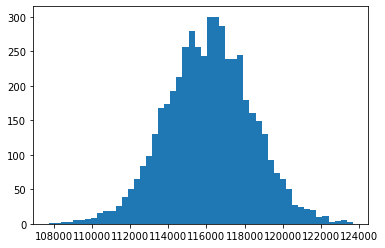

In [12]:
# visualise the distribution
plt.hist(erro_dist, bins=50)
plt.show()

In [13]:
# get the standard deviation of the erro term
standart= np.std(erro_dist, ddof=1)
standart

2261.6151608796827

In [14]:
#find the z-score
Z_score= (mean_sales-100000)/standart
Z_score

7.116341348385661

In [15]:
from scipy.stats import norm
1-norm.cdf(Z_score, loc=0,scale=1)

5.541123115904156e-13

In [17]:
# are smaller pets having beteer sales that larher pets

m=Data_sale.groupby("pet_size")['sale1'].mean()

In [18]:
s=Data_sale.groupby('pet_size')['sale1'].std()

In [40]:
s

pet_size
extra_large    69433.273184
extra_small    61803.371059
large          68805.940515
medium         66727.761902
small          65631.285450
Name: sale1, dtype: float64

In [39]:
# Anova test of difference ingroups
value_c= Data_sale['pet_type'].value_counts()
value_c


pet_type
cat        347
dog        347
fish        70
bird        69
hamster     23
rabbit      23
Name: count, dtype: int64

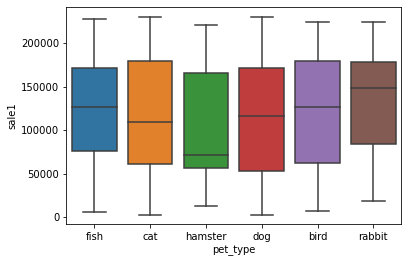

In [38]:
sns.boxplot(x='pet_type',
          y='sale1',
          data= Data_sale)
plt.show()

In [35]:
# analysi of variance
import pingouin
pingouin.anova(data=Data_sale,
              dv='sale1',
              between='pet_size')

,Source,ddof1,ddof2,F,p-unc,np2
0,pet_size,4,874,0.373154,0.827872,0.001705


In [36]:
from sklearn.neighbors import KNeighborsClassifier

x= Data_sale[['sale1', 'rating']].values
y= Data_sale['re_buy'].values

print(x.shape, y.shape)

(879, 2) (879,)


In [42]:
knn= KNeighborsClassifier(n_neighbors=15)
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=15)

In [43]:
# new data to predict
x_new=np.array([[50000, 5],[70000,9],[100000,8]])
print(x_new)

[[ 50000      5]
 [ 70000      9]
 [100000      8]]


In [46]:
# predict the  kk means
predictions= knn.predict(x_new)
print('Predictions: {}'. format(predictions))

Predictions: [1 0 0]


In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                    random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)
print(knn.score(x_test, y_test))

0.5643939393939394


In [48]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(x_train, y_train)
    train_accuracies[neighbor] = knn.score(x_train, y_train)
    test_accuracies[neighbor] = knn.score(x_test, y_test)


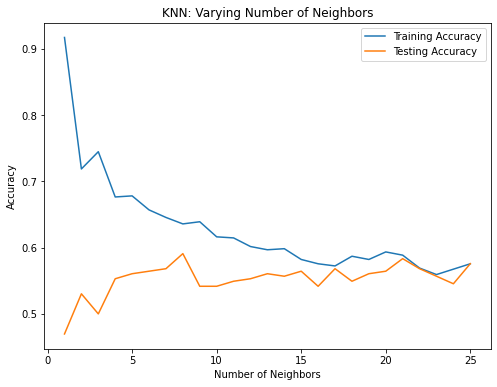

In [49]:
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [50]:
# regression studies
reg= Data_sale
bx= reg.drop('re_buy', axis=1).values
by=reg['re_buy'].values


In [119]:
print(type(bx), type(by))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


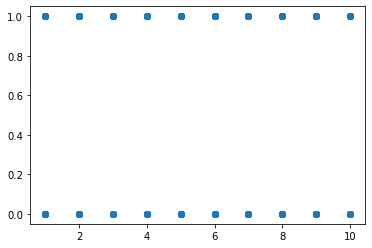

In [51]:
# predict a single feature of regrati
rating= bx[:,7]
rating= rating.reshape(-1,1)
plt.scatter(rating, by)
plt.show()

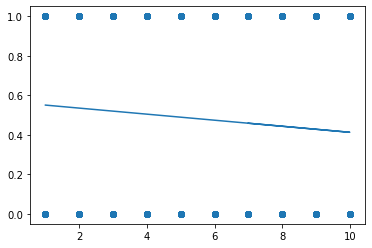

In [134]:
from sklearn.linear_model import LinearRegression
regg= LinearRegression()
regg.fit(rating, by)
predictions=regg.predict(rating)
plt.scatter(rating,by)
plt.plot(rating, predictions)


In [139]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                    random_state=21, stratify=y)
regg= LinearRegression()
regg.fit(x_train, y_train)
y_predict= regg.predict(x_test)
regg.score(x_test, y_test)


0.005355711539129948